In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/MSFT.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400


In [4]:
dataset.shape

(9464, 7)

In [5]:
dataset.drop('Adj Close', axis = 1, inplace = True)

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400


In [7]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9464 entries, 0 to 9463
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9464 non-null   object 
 1   Open    9464 non-null   float64
 2   High    9464 non-null   float64
 3   Low     9464 non-null   float64
 4   Close   9464 non-null   float64
 5   Volume  9464 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 443.8+ KB


In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,9464.000000,9464.000000,9464.000000,9464.000000,9.464000e+03
mean,50.908718,51.455029,50.352210,50.920632,5.753643e+07
std,75.241277,76.013043,74.437174,75.256362,3.818887e+07
min,0.088542,0.092014,0.088542,0.090278,2.304000e+06
25%,5.468750,5.560547,5.381348,5.460938,3.326760e+07
50%,27.139999,27.420000,26.910000,27.170000,5.075440e+07
75%,44.750000,45.152501,44.164062,44.704999,7.137710e+07
max,361.750000,366.779999,352.440002,359.489990,1.031789e+09


In [12]:
print(len(dataset))

9464


<Axes: >

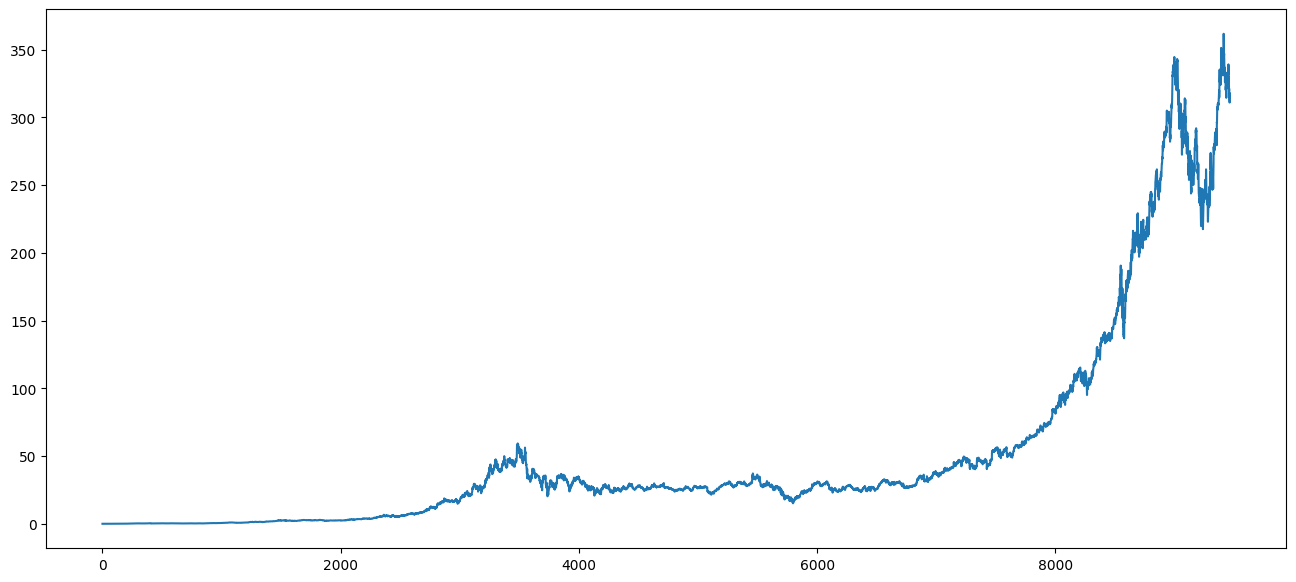

In [16]:
dataset['Open'].plot(figsize=(16,7))

In [19]:
X = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [22]:
X_train.shape

(7098, 4)

In [23]:
X_test.shape

(2366, 4)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print(regressor.coef_)

[-6.77406987e-01  8.78165794e-01  7.99039989e-01 -2.68687850e-10]


In [27]:
print(regressor.intercept_)

0.008868694641954278


In [28]:
predicted = regressor.predict(X_test)

In [29]:
print(X_test)

            Open        High         Low    Volume
1726    2.726563    2.757813    2.695313  43977600
36      0.110243    0.110243    0.109375   3254400
1167    0.885417    0.913194    0.878472  71884800
6084   30.920000   31.000000   30.620001  64557900
8242  101.800003  102.970001   99.349998  64052500
...          ...         ...         ...       ...
4339   24.200001   24.270000   24.040001  93157100
8127  101.089996  101.949997  100.540001  22165100
2224    3.796875    3.812500    3.750000  34961600
536     0.387153    0.392361    0.383681  46454400
2819   14.921875   14.968750   14.546875  74770400

[2366 rows x 4 columns]


In [30]:
predicted.shape

(2366,)

In [31]:
dframe = pd.DataFrame(y_test, predicted)

In [33]:
dfr = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [34]:
print(dfr)

          Actual   Predicted
1726    2.722656    2.725540
36      0.109375    0.117522
1167    0.892361    0.893636
6084   30.910000   30.735844
8242  101.709999  100.840979
...          ...         ...
4339   24.160000   24.112595
8127  101.629997  101.388325
2224    3.812500    3.771852
536     0.387153    0.385261
2819   14.664063   14.649175

[2366 rows x 2 columns]


In [35]:
dfr.head(25)

,Actual,Predicted
1726,2.722656,2.725540
36,0.109375,0.117522
1167,0.892361,0.893636
6084,30.910000,30.735844
8242,101.709999,100.840979
1570,2.479167,2.464905
7531,51.220001,51.374327
8750,215.229996,215.411508
6082,31.110001,31.119552
3774,28.656250,28.684417


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
regressor.score(X_test,y_test)

0.9999392103081668

In [39]:
import math

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 0.24004038359345822


In [41]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 0.3394491252588905


In [42]:
print('Root Mean Squared Error:', math.sqrt( metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 0.5826226267996211


In [47]:
graph = dfr.head(20)

<Axes: >

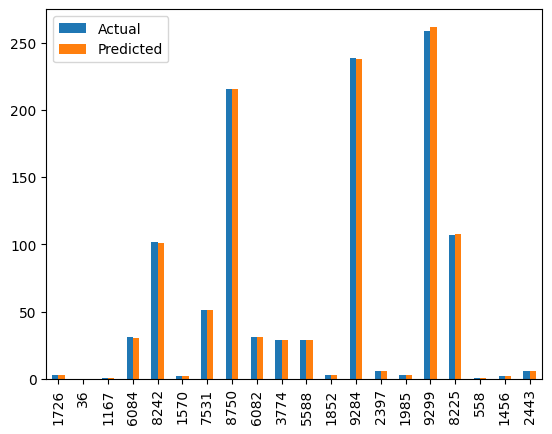

In [48]:
graph.plot(kind='bar')